In [1]:
pwd

'/content'

In [2]:
cd drive/MyDrive/GAN

/content/drive/MyDrive/GAN


Text(0.5, 1.0, 'Non_simle')

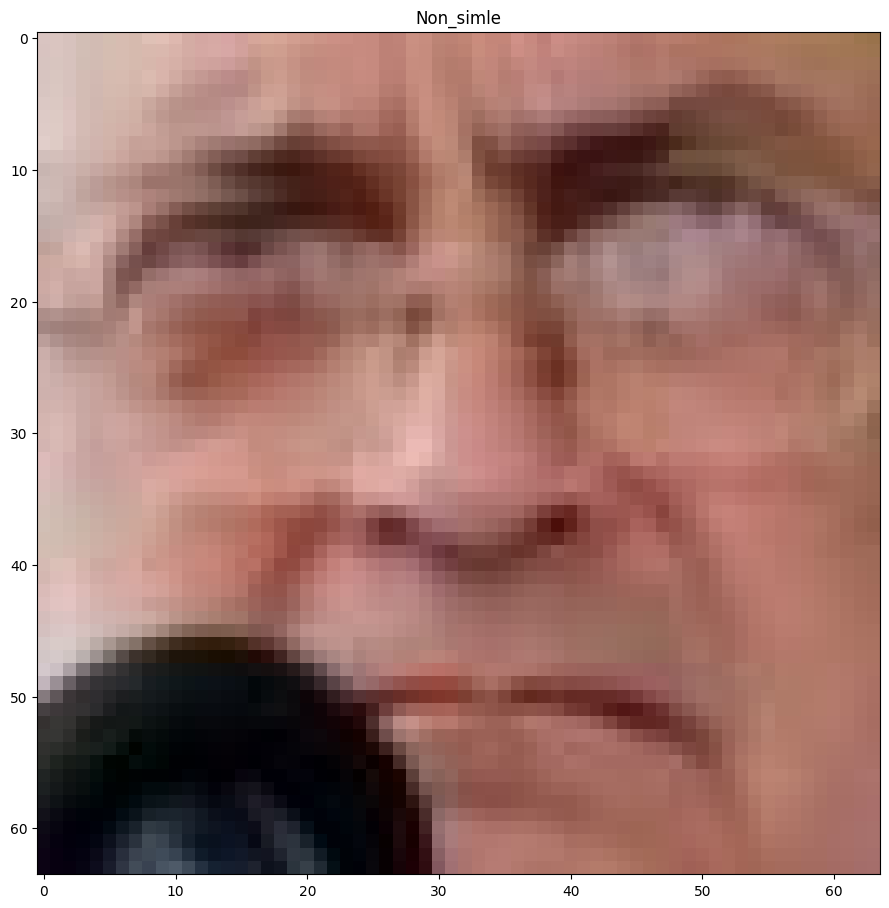

In [3]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('non_smile/Abel_Pacheco_0004.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('Non_simle')


In [4]:

pwd

'/content/drive/MyDrive/GAN'

In [7]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,
    )

train = train_gen.flow_from_directory(directory='/content/drive/MyDrive/GAN',
                                              target_size=(64, 64),
                                              color_mode='rgb',
                                              batch_size=1)

len(train[0][0])

train[0][0][0]


Found 603 images belonging to 1 classes.


array([[[0.16470589, 0.12156864, 0.10588236],
        [0.17254902, 0.12941177, 0.10588236],
        [0.22352943, 0.16470589, 0.14509805],
        ...,
        [0.454902  , 0.34509805, 0.2901961 ],
        [0.44705886, 0.34117648, 0.29803923],
        [0.4431373 , 0.3372549 , 0.29411766]],

       [[0.18039216, 0.13725491, 0.12156864],
        [0.19607845, 0.14509805, 0.12156864],
        [0.2392157 , 0.18039216, 0.16078432],
        ...,
        [0.47450984, 0.3647059 , 0.30980393],
        [0.47450984, 0.3647059 , 0.32156864],
        [0.47058827, 0.3647059 , 0.32156864]],

       [[0.19215688, 0.14901961, 0.13333334],
        [0.21176472, 0.16078432, 0.13725491],
        [0.25882354, 0.20000002, 0.18039216],
        ...,
        [0.48627454, 0.37254903, 0.31764707],
        [0.4901961 , 0.37254903, 0.33333334],
        [0.4901961 , 0.3803922 , 0.3372549 ]],

       ...,

       [[0.59607846, 0.6117647 , 0.47450984],
        [0.43921572, 0.454902  , 0.31764707],
        [0.2509804 , 0

In [8]:
train[0][0][0].shape


(64, 64, 3)

In [9]:
train[0][0].shape

(1, 64, 64, 3)

In [10]:
train[0][0]

array([[[[0.16470589, 0.12156864, 0.10588236],
         [0.17254902, 0.12941177, 0.10588236],
         [0.22352943, 0.16470589, 0.14509805],
         ...,
         [0.454902  , 0.34509805, 0.2901961 ],
         [0.44705886, 0.34117648, 0.29803923],
         [0.4431373 , 0.3372549 , 0.29411766]],

        [[0.18039216, 0.13725491, 0.12156864],
         [0.19607845, 0.14509805, 0.12156864],
         [0.2392157 , 0.18039216, 0.16078432],
         ...,
         [0.47450984, 0.3647059 , 0.30980393],
         [0.47450984, 0.3647059 , 0.32156864],
         [0.47058827, 0.3647059 , 0.32156864]],

        [[0.19215688, 0.14901961, 0.13333334],
         [0.21176472, 0.16078432, 0.13725491],
         [0.25882354, 0.20000002, 0.18039216],
         ...,
         [0.48627454, 0.37254903, 0.31764707],
         [0.4901961 , 0.37254903, 0.33333334],
         [0.4901961 , 0.3803922 , 0.3372549 ]],

        ...,

        [[0.59607846, 0.6117647 , 0.47450984],
         [0.43921572, 0.454902  , 0.31764707]

In [11]:
type(train[0][0])

numpy.ndarray

In [12]:
X_train = np.array(train[0][0])

for i in range(1,600):
  X_train = np.append(X_train, train[i][0], axis = 0)

X_train.shape

(600, 64, 64, 3)

In [13]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam


img_rows = 64
img_cols = 64
channels = 3
img_shape = (img_rows, img_cols, channels)
z_dim = 100


def build_generator(img_shape, z_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(64 * 64 * 3, activation='sigmoid'))
    model.add(Reshape(img_shape))

    return model


def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))

    return model


def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)

    return model


discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(),
                      metrics=['accuracy'])

generator = build_generator(img_shape, z_dim)


gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

losses = []
accuracies = []
iteration_checkpoints = []




def train(iterations, batch_size, sample_interval, X_train2):

    X_train = X_train2


    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        discriminator.trainable = True

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        discriminator.trainable = False

        z = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)



def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)

    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, :] )
            axs[i, j].axis('off')
            cnt += 1


iterations = 10000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval, X_train)

losses = np.array(losses)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

accuracies = np.array(accuracies)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

Output hidden; open in https://colab.research.google.com to view.